In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report


# import xgboost as xgb

In [13]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [15]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


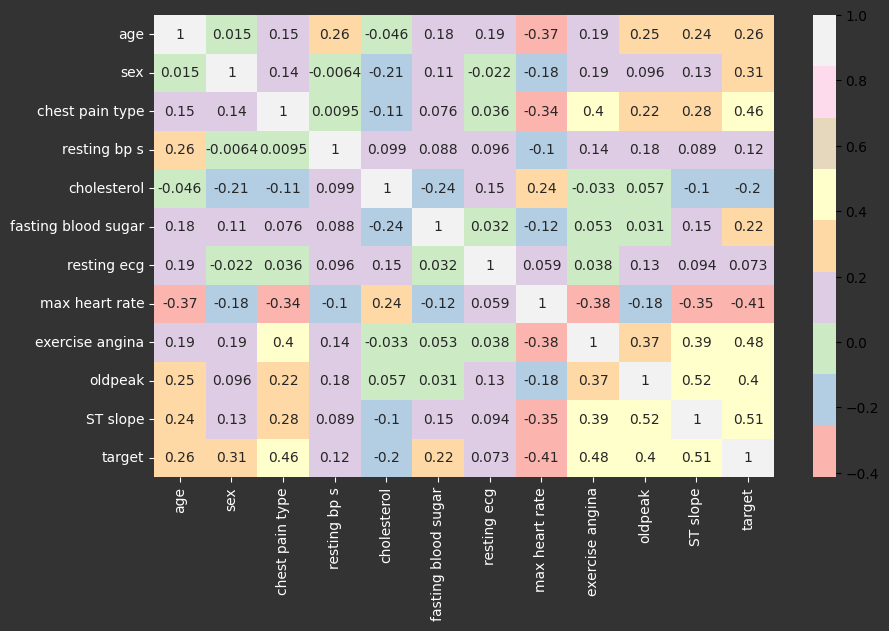

In [16]:
plt.figure(figsize=(10, 6),facecolor='#333333')
sns.heatmap(df.corr(), annot=True, cmap='Pastel1').tick_params(colors='white') 
plt.show()

In [17]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [18]:
df.shape

(1190, 12)

In [19]:
df.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

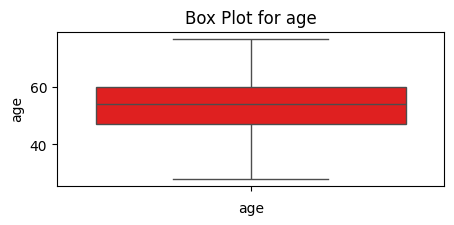

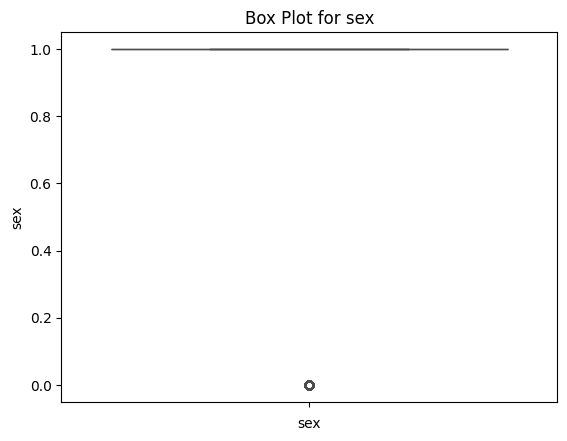

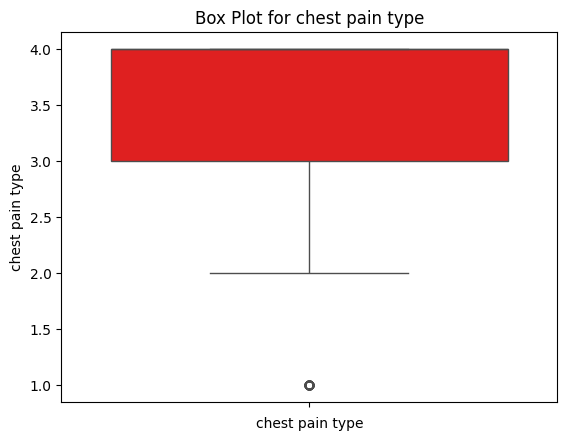

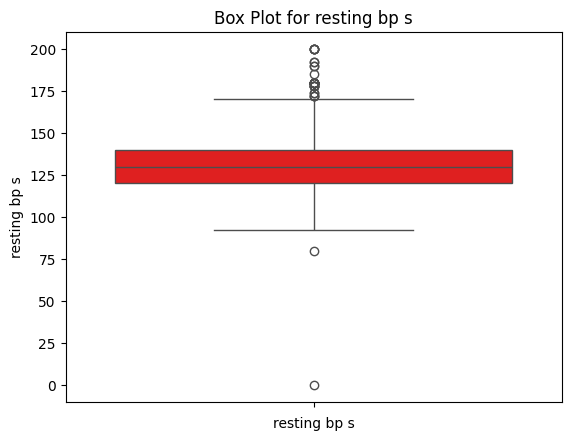

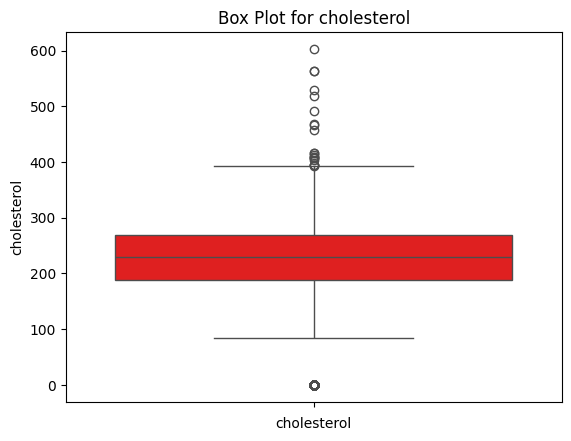

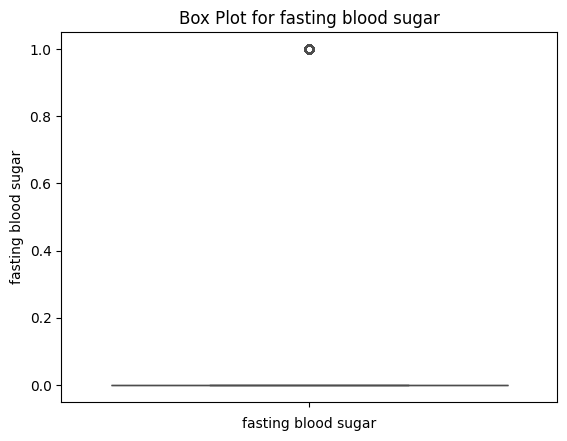

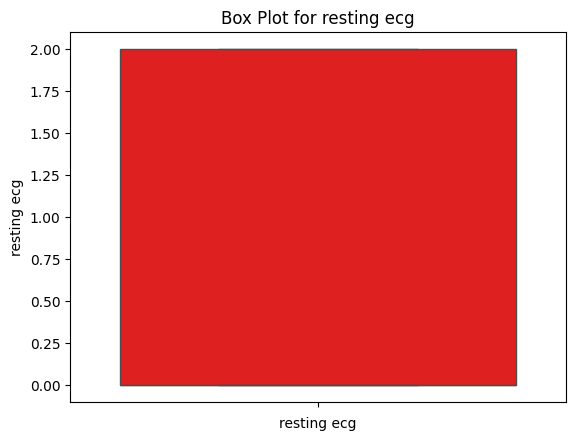

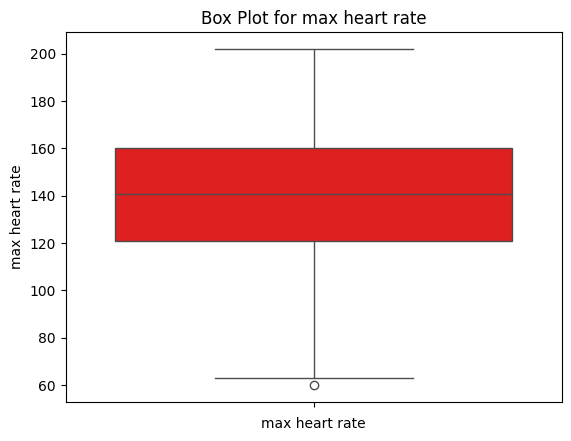

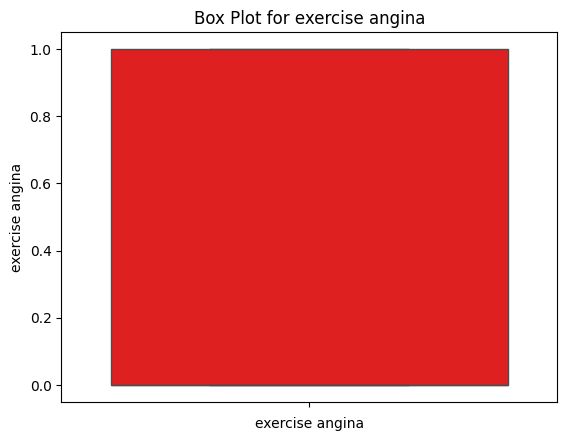

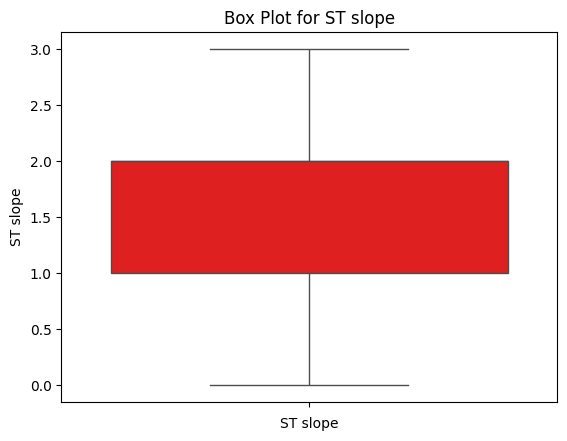

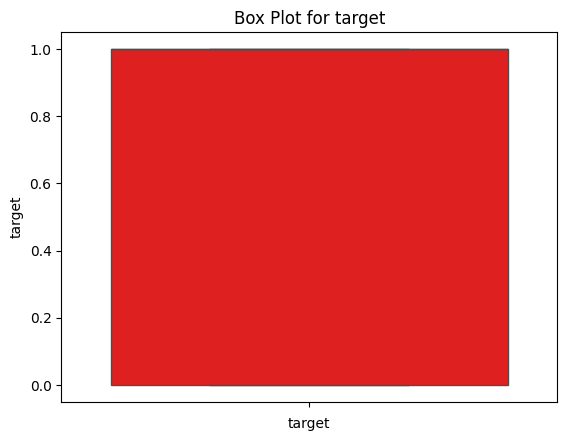

In [23]:
ColList=list(df.select_dtypes('int64').columns)
#Box Plot
plt.figure(figsize=(5, 2))
for column in ColList:
    sns.boxplot(y=df[column], color='red')
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    plt.show()

In [24]:
X = df.drop(columns=['target'])
y = df['target']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

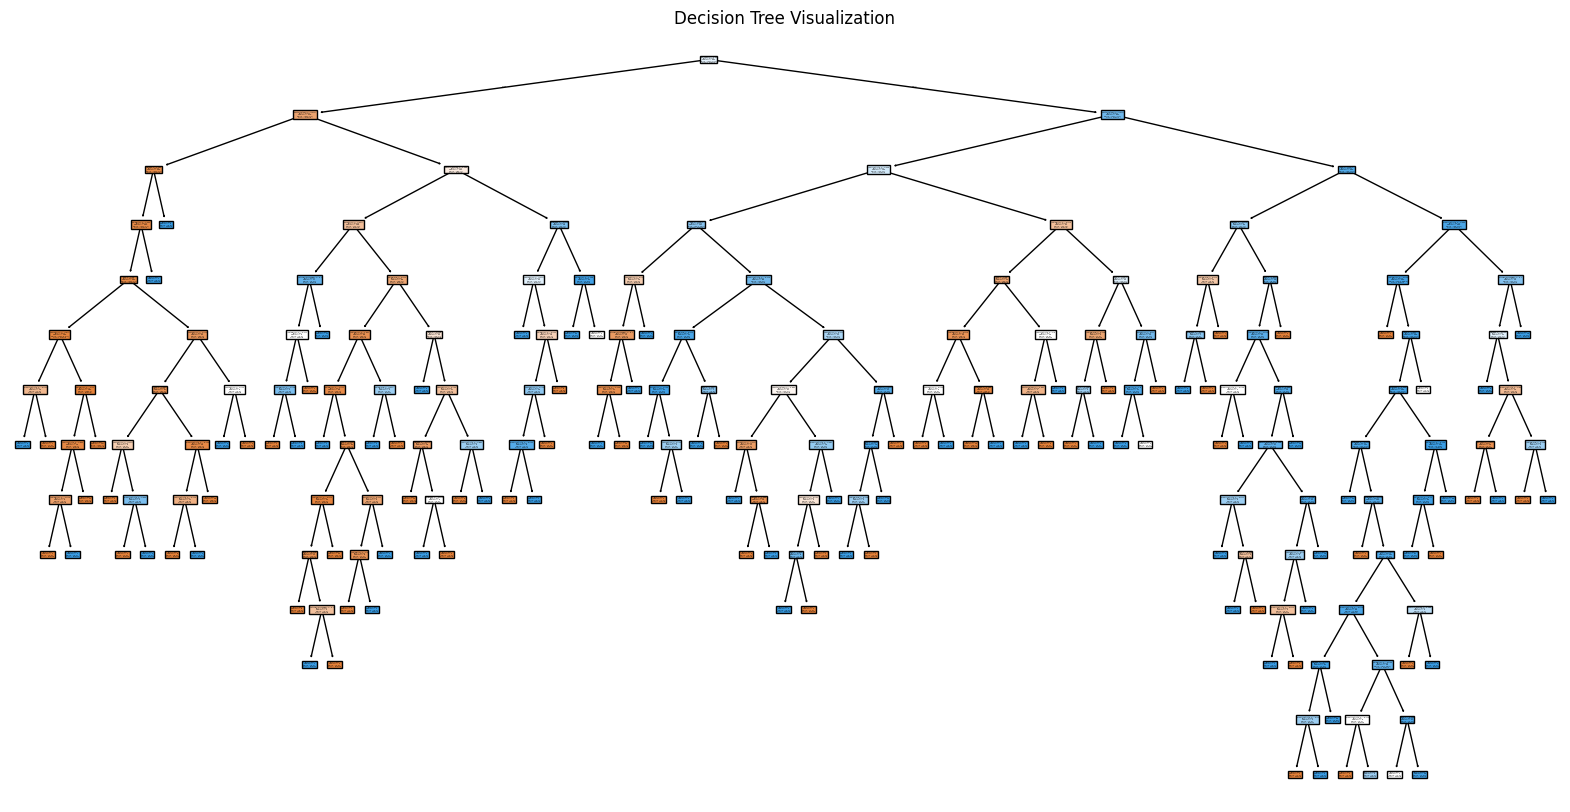

Best Parameters: {'max_depth': 13, 'min_samples_split': 3}
Test Accuracy: 0.8361344537815126


In [28]:
#Decision tree parameter estimation
decicisionTree = DecisionTreeClassifier()
paramGrid = {
    'max_depth': [3, 5, 8, 13, None],  # Try different depths
    'min_samples_split': [3, 5, 8, 13,21]  # Try different splits
}

# Use GridSearchCV to find the best hyperparameters
gridSearch = GridSearchCV(estimator=decicisionTree, param_grid=paramGrid, cv=5, scoring='accuracy')
gridSearch.fit(X_train, y_train)


# Get the best parameters
bestParam = gridSearch.best_params_

# Evaluate on the test set
bestModel = gridSearch.best_estimator_

plt.figure(figsize=(20, 10))
plot_tree(bestModel, feature_names=df.columns, class_names=["Class 0", "Class 1"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()
y_pred = bestModel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", bestParam)
print("Test Accuracy:", accuracy)